<a href="https://colab.research.google.com/github/samuelpolontalo/playstore_review/blob/main/playstore_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import json
import pandas as pd
from tqdm import tqdm

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
path = 'gdrive/MyDrive/playstore_review/'

Mounted at /content/gdrive


In [5]:
app_packages = [
                'com.gojek.app',
                'com.grabtaxi.passenger'
]

In [6]:
app_infos = []

for application in tqdm(app_packages):
  info = app(application, lang='id', country='id')
  del info['comments']
  app_infos.append(info)

100%|██████████| 2/2 [00:00<00:00,  5.12it/s]


In [7]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys = True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [8]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.gojek.app",
  "containsAds": false,
  "contentRating": "Rating 3+",
  "contentRatingDescription": null,
  "currency": "IDR",
  "description": "Gojek bukan hanya aplikasi penyedia layanan transportasi, pesan antar makanan, logistik, pembayaran, dan kebutuhan sehari-hari, loh.\r\n\r\nGojek juga punya misi sosial untuk meningkatkan taraf hidup masyarakat. Caranya? Dengan saling membantu!\r\n\r\nSampai hari ini, Gojek telah bermitra dengan lebih dari 1 juta driver, 125 ribu pedagang kuliner, dan 30 ribu penyedia jasa lainnya, semua tersebar di 50 kota di Indonesia.\r\n\r\nNah, dengan men-download aplikasi dan menggunakan jasa Gojek, kamu gak cuma bakal terbantu dalam mengerjakan urusan kamu sehari-hari\u2026 tapi kamu juga bakal membantu para mitra Gojek dalam menggapai mimpi-mimpi mereka dan keluarga mereka, dan turut jadi bagian dari misi meningkatkan taraf hidup masyarakat Indonesia!\r\n\r\nNgomong-ngomong, lewat aplikasi Gojek bisa ngapain aja,

In [9]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

In [10]:
app_infos_df = pd.DataFrame(app_infos)

In [11]:
app_infos_df.to_csv(path + 'apps.csv', index= None, header=True)

In [12]:
app_reviews = []

for ap in tqdm(app_packages):
  for score in list(range(1,6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs,_ = reviews(
          ap,
          lang='id',
          country='id',
          sort= sort_order,
          count=200 if score == 3 else 100,
          filter_score_with = score
      )
      for r in rvs:
        r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        r['appId'] = ap
      app_reviews.extend(rvs)

100%|██████████| 2/2 [00:06<00:00,  3.36s/it]


In [13]:
print_json(app_reviews[0])

{
  "appId": "com.gojek.app",
  "at": "2022-07-08 05:48:58",
  "content": "Tidak pernah puas menggunakan app ini, titik/alamat sering tidak sesuai/akurat. Chat dengan driver jg sering tidak terkirim padahal koneksi bagus sekalipun. Komplain pun tidak ada solusi/jalan keluar, hanya sekedar angin lalu tanpa ada perbaikan kedepannya. Karena saya alami tidak hanya 1 2 3 4x dan selalu sama , sangat mengecewakan. Dan mungkin cukup kesabaran saya sampai sini. Setelah ini tidak akan saya gunakan lagi app ini. Terimakasi",
  "repliedAt": "2022-07-09 04:51:07",
  "replyContent": "Hai Pretty Intan, mohon maaf ya. Laporan yang kamu sampaikan akan menjadi masukan bagi kami untuk terus meningkatkan kualitas layanan kami ke depannya. Apabila kamu mengalami kendala terkait layanan Gojek, silakan laporkan melalui menu Bantuan di aplikasi Gojek agar tim kami bisa bantu cek ya. ^Meta",
  "reviewCreatedVersion": "4.47.1",
  "reviewId": "4601f2fc-5d18-4dd5-9e84-4c94515954f6",
  "score": 1,
  "sortOrder": "

In [14]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df = app_reviews_df.sort_values(["appId","at"])
app_reviews_df.to_csv(path + 'apps_reviews.csv', index= None, header=True)

In [ ]:
app_reviews_df.info()

In [16]:
app_reviews_df.fillna("No Replay", inplace=True)

In [17]:
app_reviews_df.isnull()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
524,False,False,False,False,False,False,False,False,False,False,False,False
552,False,False,False,False,False,False,False,False,False,False,False,False
536,False,False,False,False,False,False,False,False,False,False,False,False
545,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1500,False,False,False,False,False,False,False,False,False,False,False,False
2301,False,False,False,False,False,False,False,False,False,False,False,False
2300,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
app_reviews_df = app_reviews_df.set_index('appId', inplace=False)
app_reviews_gojek_df = app_reviews_df.loc['com.gojek.app']
app_reviews_grab_df = app_reviews_df.loc['com.grabtaxi.passenger']

In [19]:
app_reviews_gojek_df.reset_index(level=0, inplace=True)
app_reviews_grab_df.reset_index(level=0, inplace=True)

In [20]:
app_reviews_gojek_df

,appId,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder
0,com.gojek.app,a8f11839-ffd6-43db-bfc7-aeca3b58053f,O K T A R I A N,https://play-lh.googleusercontent.com/a-/AFdZu...,"Setiap pesanan saya selalu mengecewakan, bayar...",3,29,4.36.1,2022-01-29 20:01:42,"Hai Oktarian, terima kasih atas ulasanmu dan m...",2022-01-31 06:16:57,most_relevant
1,com.gojek.app,2807cc4a-60b7-4262-90da-d0d51765e9ad,gumilang galihwasi,https://play-lh.googleusercontent.com/a-/AFdZu...,Kalau berkenan bisa nga di aplikasi kalau pesa...,3,10,4.36.1,2022-02-10 13:08:43,"Hai Gumilang Galihwasi, mohon maaf untuk kenda...",2022-02-11 06:22:57,most_relevant
2,com.gojek.app,70f28afa-3367-4488-8334-00556d741af9,csuga andara,https://play-lh.googleusercontent.com/a-/AFdZu...,Maaf saya harus kurangin bintangnya.. Saya seb...,3,314,4.37.1,2022-02-11 12:04:50,"Hai Csuga Andara, terima kasih atas ulasanmu. ...",2022-02-12 05:17:09,most_relevant
3,com.gojek.app,79078e87-5ff8-410a-924e-d4fc17d687df,ganjar dwi,https://play-lh.googleusercontent.com/a-/AFdZu...,Hanya catatan di harga Gofood. Kenapa sudah ma...,3,34,4.36.1,2022-02-18 05:54:09,"Hai Ganjar Dwi, mohon maaf untuk kendalanya. L...",2022-02-19 06:46:34,most_relevant
4,com.gojek.app,0a04a58b-44a2-4f37-87d3-a7f0bb442e75,R Hadid,https://play-lh.googleusercontent.com/a-/AFdZu...,Selain kalo hujan seringnya dapet driver jauh2...,3,393,4.38.2,2022-02-28 09:04:00,"Hai R Hadid, mohon maaf atas kendalanya. Pasti...",2022-03-01 06:11:59,most_relevant
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,com.gojek.app,7524ef4e-69bb-43c4-832d-d62162ccf246,Ratri Alfaris,https://play-lh.googleusercontent.com/a/AItbvm...,Sangat membantu,5,0,4.47.1,2022-07-13 03:42:14,No Replay,No Replay,newest
1196,com.gojek.app,b57c0e12-48cc-42b2-a92e-2651bc609f1d,Alkhalifi Morello,https://play-lh.googleusercontent.com/a/AItbvm...,Gak bermutu maen blokir blokir aja .... Yang g...,1,0,4.47.1,2022-07-13 03:43:22,"Hai Alkhalifi, terima kasih atas ulasan kamu. ...",2022-06-25 01:10:41,newest
1197,com.gojek.app,2290843d-5b8e-4c75-a9b2-f604cd636693,Adi Kempet,https://play-lh.googleusercontent.com/a/AItbvm...,sangat memuaskan,4,0,4.46.2,2022-07-13 03:44:22,No Replay,No Replay,newest
1198,com.gojek.app,8d5f3013-2783-41d6-95ac-20c9b870bfc9,Suparmin Ginting,https://play-lh.googleusercontent.com/a/AItbvm...,Bagus🥰,5,0,No Replay,2022-07-13 03:45:15,No Replay,No Replay,newest


In [21]:
app_reviews_gojek_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   appId                 1200 non-null   object        
 1   reviewId              1200 non-null   object        
 2   userName              1200 non-null   object        
 3   userImage             1200 non-null   object        
 4   content               1200 non-null   object        
 5   score                 1200 non-null   int64         
 6   thumbsUpCount         1200 non-null   int64         
 7   reviewCreatedVersion  1200 non-null   object        
 8   at                    1200 non-null   datetime64[ns]
 9   replyContent          1200 non-null   object        
 10  repliedAt             1200 non-null   object        
 11  sortOrder             1200 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 112.6+ KB


In [22]:
app_reviews_gojek_feb = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2022-02']
app_reviews_gojek_mar = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2022-03']
app_reviews_gojek_apr = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2022-04']
app_reviews_gojek_mei = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2022-05']
app_reviews_gojek_jun = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2022-06']
app_reviews_gojek_jul = app_reviews_gojek_df[app_reviews_gojek_df['at'].dt.strftime('%Y-%m') == '2022-07']

app_reviews_gojek_feb['Average_rating'] = app_reviews_gojek_feb['score'].mean()
app_reviews_gojek_mar['Average_rating'] = app_reviews_gojek_mar['score'].mean()
app_reviews_gojek_apr['Average_rating'] = app_reviews_gojek_apr['score'].mean()
app_reviews_gojek_mei['Average_rating'] = app_reviews_gojek_mei['score'].mean()
app_reviews_gojek_jun['Average_rating'] = app_reviews_gojek_jun['score'].mean()
app_reviews_gojek_jul['Average_rating'] = app_reviews_gojek_jul['score'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [23]:
app_reviews_grab_feb = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2022-02']
app_reviews_grab_mar = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2022-03']
app_reviews_grab_apr = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2022-04']
app_reviews_grab_mei = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2022-05']
app_reviews_grab_jun = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2022-06']
app_reviews_grab_jul = app_reviews_grab_df[app_reviews_grab_df['at'].dt.strftime('%Y-%m') == '2022-07']

app_reviews_grab_feb['Average_rating'] = app_reviews_grab_feb['score'].mean()
app_reviews_grab_mar['Average_rating'] = app_reviews_grab_mar['score'].mean()
app_reviews_grab_apr['Average_rating'] = app_reviews_grab_apr['score'].mean()
app_reviews_grab_mei['Average_rating'] = app_reviews_grab_mei['score'].mean()
app_reviews_grab_jun['Average_rating'] = app_reviews_grab_jun['score'].mean()
app_reviews_grab_jul['Average_rating'] = app_reviews_grab_jul['score'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [24]:
df_all_grab = pd.concat([app_reviews_grab_feb.iloc[0], app_reviews_grab_apr.iloc[0],app_reviews_grab_mei.iloc[0], app_reviews_grab_jun.iloc[0], app_reviews_grab_jul.iloc[0]])

In [25]:
df_all_gojek = pd.concat([app_reviews_gojek_feb.iloc[0], app_reviews_gojek_apr.iloc[0],app_reviews_gojek_mei.iloc[0], app_reviews_gojek_jun.iloc[0], app_reviews_gojek_jul.iloc[0]])

In [26]:
df_new_plot = {
    'Date':['Feb','Mar','Apr','May','June'],
    'GrabScore':(round(df_all_grab.Average_rating[0],2), round(df_all_grab.Average_rating[1],2),round(df_all_grab.Average_rating[2],2), 
                 round(df_all_grab.Average_rating[3],2), round(df_all_grab.Average_rating[4],2)),
    'GojekScore':(round(df_all_gojek.Average_rating[0],2), round(df_all_gojek.Average_rating[1],2),round(df_all_gojek.Average_rating[2],2), 
                 round(df_all_gojek.Average_rating[3],2), round(df_all_gojek.Average_rating[4],2))
}

In [27]:
df_new_plot = pd.DataFrame(df_new_plot)

In [28]:
df_new_plot

,Date,GrabScore,GojekScore
0,Feb,3.33,3.00
1,Mar,3.08,3.00
2,Apr,3.02,3.14
3,May,2.87,3.24
4,June,3.02,2.89


In [29]:
import matplotlib.pyplot as plt

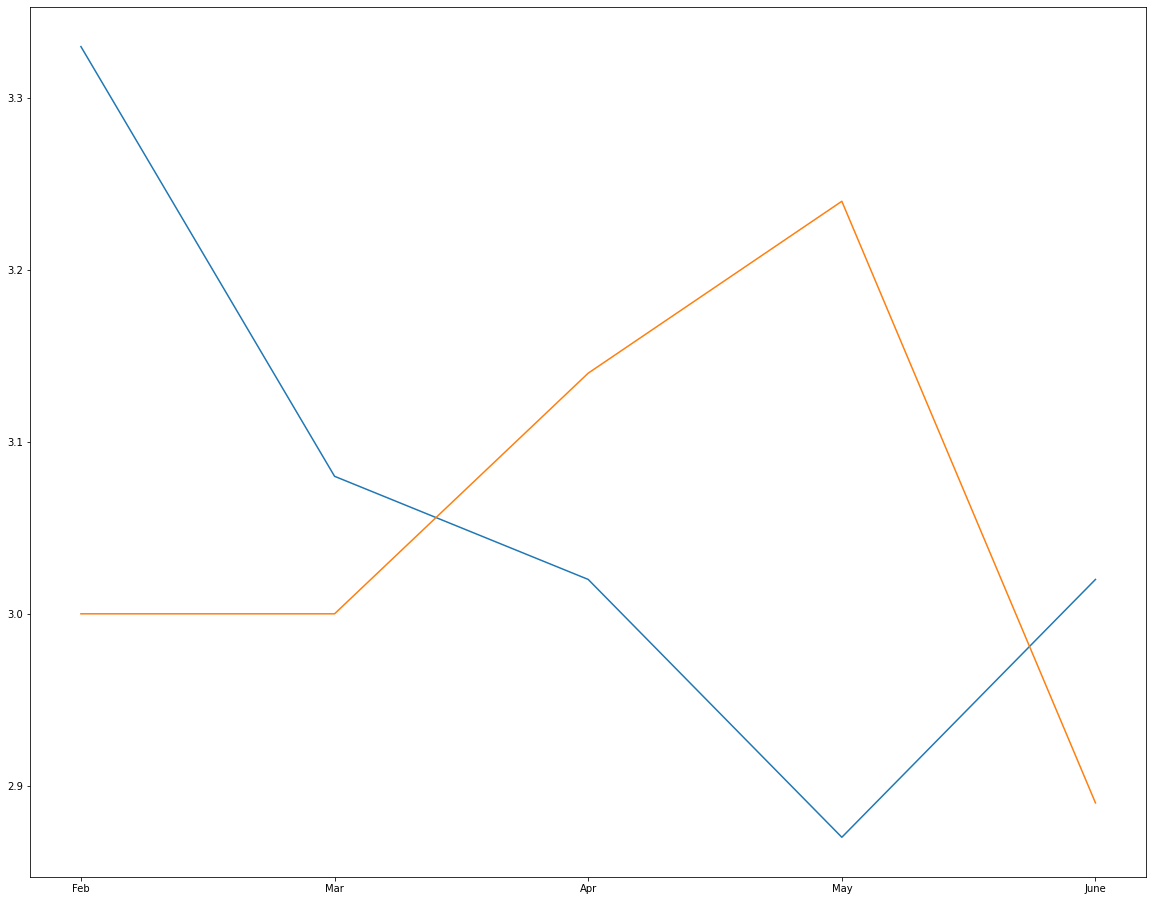

In [30]:
fig = plt.figure(figsize=(20,16))
plt.plot(df_new_plot.Date, df_new_plot.GrabScore, df_new_plot.GojekScore)